## Projet Python data visualisation 

Modalité d’évaluation 
4 compétences évaluées 

Notation sur 20 :
Consignes 
- Votre analyse sous forme de Jupyter Notebook devra contenir
  - Au moins 1 diagramme avec données continues, type nuage de point ou histogramme
  - Au moins 2 diagramme avec des données discrètes
  - Au moins 3 graphiques avec des données catégoriques
  - 1 boîte à moustaches avec filtrage des données aberrantes sur le dataset (si il y en a)
  - 1 heat map avec matrice de corrélation (si pertinent)
  - Des commentaires clairs et pertinents pour chaque graphiques

dataset : kaggle / paperwithcode / google dataset research


# Compétence évaluée

1) Compréhension du sujet
    - choix de data pertinent + explication du sujet
    - Bien vulgariser le sujet
    - Problématique métier associé
    
2) Structure du Notebook :
    - Comment on répond aux questions données
    - Utilisé des graphiques intéressant au bonne endroit

3) La pertinence du projet :
    - Aspect Graphique (exemple date ilisible = sert à rien => caster des données) 
    - Données lisisble (filtrer données + expliquer comment on a filtré)
    - Pas de warning ou d'erreur ()
    
4) Présentation écrite des résultats
    - Faire des phrases : sujet - verbe - complément
        "Je rappel que ma prob c'était ca, j'avais ce jeu de données la .."
    - Pas juste dire 'je vois un écart type de 2 et une moyenne de 3'
    - Faire des hypothèses

# Import

On commence par importer les librairies nécessaires à notre projet d'étude de données.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('libs loaded')

libs loaded


# Initialisation

On initialise ensuite ce qui doit l'être

## Le thème de seaborn

In [2]:
sns.set_theme()

## Le dataset qui sera étudié sur ce notebook

In [3]:
dataset = pd.read_csv("./data/student-por.csv")
dataset["Pstatus"]

0      A
1      T
2      T
3      T
4      T
      ..
644    T
645    T
646    T
647    T
648    T
Name: Pstatus, Length: 649, dtype: object

# Expression du sujet

## Description du jeu de données

On observe ici un jeu de données fournissant des informations sur des étudiants comprenant entre autre:
- L'école dans laquelle ils sont parmis 2
- Le sexe
- L'éducation et le travail des parents
- Les absences
- La note sur 20 par trimestre

## Problématique

### *Quels sont les paramètres affectant les notes d'un élève ?*

# Préparation des données au traitement

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Nous allons transformer toutes les valeurs booléennes qui sont sous la formes "yes"/"no" (voir ci-dessus) ou autres ("MS"/"GP" pour l'école) en valeurs chiffrées 1/0 pour les rendre étudiables

In [5]:
formatted = dataset
formatted.sex = formatted.sex.replace(to_replace=["M", "F"], value=[1, 0])
formatted.famsize = formatted.famsize.replace(to_replace=["LE3", "GT3"], value=[0, 1])
formatted.schoolsup = formatted.schoolsup.replace(to_replace=["yes", "no"], value=[1, 0])
formatted.famsup = formatted.famsup.replace(to_replace=["yes", "no"], value=[1, 0])
formatted.paid = formatted.paid.replace(to_replace=["yes", "no"], value=[1, 0])
formatted.activities = formatted.activities.replace(to_replace=["yes", "no"], value=[1, 0])
formatted.nursery = formatted.nursery.replace(to_replace=["yes", "no"], value=[1, 0])
formatted.higher = formatted.higher.replace(to_replace=["yes", "no"], value=[1, 0])
formatted.internet = formatted.internet.replace(to_replace=["yes", "no"], value=[1, 0])
formatted.romantic = formatted.romantic.replace(to_replace=["yes", "no"], value=[1, 0])
formatted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    int64 
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    int64 
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    int64 
 16  famsup      649 non-null    int64 
 17  paid        649 non-null    int64 
 18  activities  649 non-null    int64 
 19  nursery     649 non-null    int64 
 20  higher    

# Etude

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    int64 
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    int64 
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    int64 
 16  famsup      649 non-null    int64 
 17  paid        649 non-null    int64 
 18  activities  649 non-null    int64 
 19  nursery     649 non-null    int64 
 20  higher    

## HeatMap

<AxesSubplot:>

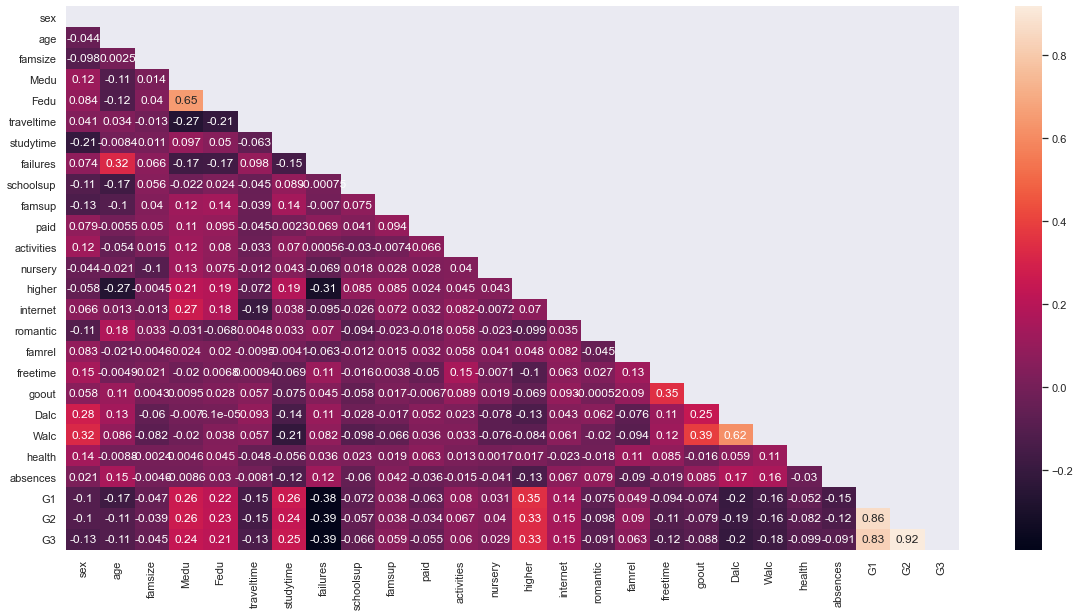

In [7]:
corr = dataset.corr()
# corr
mask = np.triu(np.ones_like(corr, dtype=bool))
# mask
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data=corr,mask=mask, annot=True, ax=ax)

### Etude du nombre d'absences en fonction de l'âge de l'étudiant

<AxesSubplot:xlabel='age', ylabel='absences'>

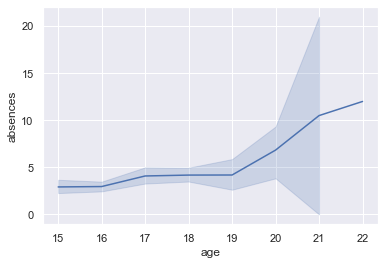

In [8]:
sns.lineplot(data=dataset, x="age", y="absences")

### Etude des notes du premier trimestre en fonction du nombre d'absences

<AxesSubplot:xlabel='G1', ylabel='absences'>

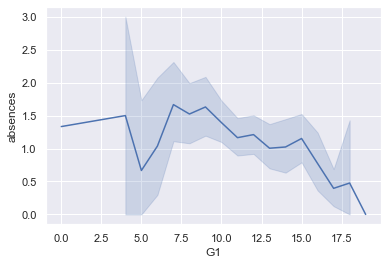

In [9]:
sns.lineplot(data=dataset, x="G1", y=dataset["absences"]/3)